In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [5]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [9]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [12]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'), #C2
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S1
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #C3
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #C4
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S2
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'), #C5
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'), #C6
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S3
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(512, activation='relu'), #F1
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [13]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [14]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 19s 8ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/100
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3026 -

In [16]:

lenet_data = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

lenet_data.fit(x_train)

from tensorflow.keras import layers, models
lenet =  keras.models.Sequential([
         keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),
         keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),
         keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),
         keras.layers.Flatten(),
         keras.layers.Dense(512, activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(10, activation='softmax')
])

lenet.compile(optimizer='adam',  loss=keras.losses.sparse_categorical_crossentropy,  metrics=['accuracy'])

history = lenet.fit(lenet_data.flow(x_train, y_train, batch_size=64), epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
782/782 [==============================] - 46s 48ms/step - loss: 1.7119 - accuracy: 0.3970 - val_loss: 1.2358 - val_accuracy: 0.5595
Epoch 2/100
782/782 [==============================] - 35s 44ms/step - loss: 1.2926 - accuracy: 0.5390 - val_loss: 1.0036 - val_accuracy: 0.6449
Epoch 3/100
782/782 [==============================] - 35s 45ms/step - loss: 1.1024 - accuracy: 0.6116 - val_loss: 1.1831 - val_accuracy: 0.6136
Epoch 4/100
782/782 [==============================] - 36s 46ms/step - loss: 0.9987 - accuracy: 0.6532 - val_loss: 1.1156 - val_accuracy: 0.6521
Epoch 5/100
782/782 [==============================] - 35s 45ms/step - loss: 0.9259 - accuracy: 0.6831 - val_loss: 0.9505 - val_accuracy: 0.6707
Epoch 6/100
782/782 [==============================] - 36s 46ms/step - loss: 0.8730 - accuracy: 0.7035 - val_loss: 0.7632 - val_accuracy: 0.7408
Epoch 7/100
782/782 [==============================] - 37s 47ms/step - loss: 0.8207 - accuracy: 0.7212 - val_loss: 0.7635 - val_ac

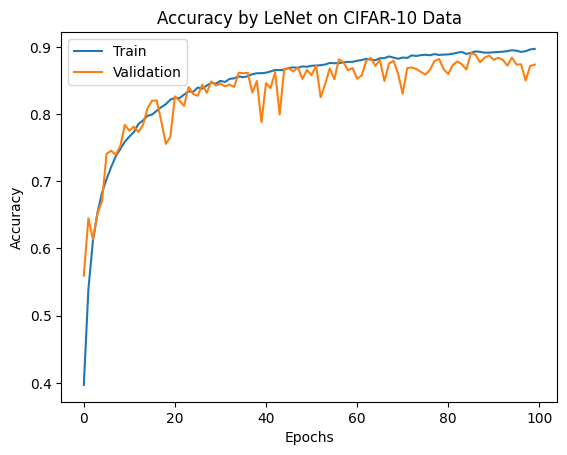

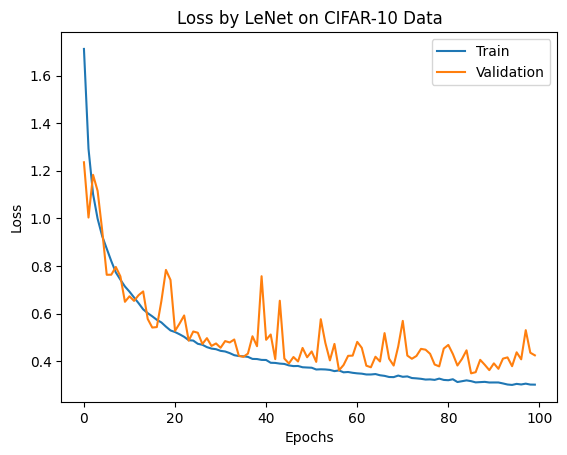

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()